# Análisis de la Contaminación del Aire en Chile
**Minería de Datos CC5205-1**

Estudiantes:

Juan Pablo Bustamante  
Diego Alonso Carter  
Carolina Navarro P.  
Valentina  
Tomás Vallejo


<h1 style="margin-bottom:0.4em;">Introducción</h1>

<p>En este primer hito del proyecto de Minería de Datos (CC5205-1) nos proponemos <b>explorar y preparar</b> un conjunto de datos reales sobre calidad del aire en Chile, con el objetivo de <b>desarrollar modelos predictivos</b> capaces de anticipar niveles de contaminación atmosférica y <b>emitir alertas tempranas</b> frente a episodios críticos utilizando información histórica y <b>variables meteorológicas</b>. Esta fase inicial busca establecer bases sólidas de curaduría y comprensión de las series temporales para facilitar ciclos posteriores de modelado y evaluación.</p>

<p>Los datos provienen del <b>Sistema de Información Nacional de Calidad del Aire (SINCA)</b> del Ministerio del Medio Ambiente e incluyen mediciones de contaminantes atmosféricos (PM2.5, PM10, SO₂, NO₂, O₃, CO), variables meteorológicas (temperatura, humedad, dirección y velocidad del viento), metadatos temporales (hora del día, día de la semana, estacionalidad), información geográfica de las estaciones de monitoreo y el <b>Índice de Calidad del Aire (ICAP)</b>. Esta combinación permite estudiar <b>patrones espacio-temporales</b>, dependencias entre contaminantes y clima, así como la ocurrencia de <b>episodios críticos</b> por zona geográfica y estación del año.</p>

<p>La motivación se fundamenta en la <b>relevancia sanitaria y ambiental</b> de la contaminación atmosférica en Chile. Un análisis riguroso de estas series temporales puede revelar <b>tendencias</b>, <b>anomalías</b> y factores condicionantes (como patrones de viento y estabilidad atmosférica), habilitando <b>herramientas predictivas</b> que apoyen tanto decisiones individuales (planificación de actividades al aire libre) como de <b>política pública</b> (gestión de episodios críticos, implementación de medidas preventivas y fiscalización ambiental). Además, reconocer la <b>heterogeneidad entre estaciones</b> y distintos contextos urbanos e industriales es fundamental para construir modelos robustos y transferibles.</p>

<p><strong>Los objetivos específicos de este hito incluyen:</strong></p>
<ol>
  <li><strong>Exploración y perfilado</strong> de datos: análisis de distribuciones, identificación de datos faltantes, detección de valores atípicos, evaluación de estacionalidad y autocorrelación.</li>
  <li><strong>Limpieza e imputación</strong> de datos faltantes mediante criterios de calidad, definición de ventanas temporales y aplicación de métodos estadísticos apropiados.</li>
  <li><strong>Integración y sincronización temporal</strong> entre estaciones y variables, incluyendo alineación de resoluciones temporales y coherencia en marcas de tiempo.</li>
  <li><strong>Etiquetado de episodios críticos</strong> basado en ICAP y umbrales normativos para facilitar tareas de clasificación.</li>
  <li><strong>Análisis de relaciones</strong> entre contaminantes y meteorología, así como evaluación de patrones espaciales entre estaciones.</li>
  <li><strong>Definición preliminar</strong> de características y modelos base para regresión (predicción de PM2.5) y clasificación de alertas ambientales.</li>
</ol>

<p>Con esta estructura metodológica establecemos el contexto, caracterizamos los datos disponibles y definimos el alcance del trabajo inicial, preparando las bases para que en etapas posteriores podamos <b>entrenar y validar</b> modelos con resultados <b>confiables y aplicables</b> al contexto nacional.</p>


<h1 style="margin-bottom:0.4em;">Exploración de datos</h1>

<p>En esta etapa inicial recopilamos y organizamos el conjunto de datos de calidad del aire proveniente del <b>Sistema de Información Nacional de Calidad del Aire (SINCA)</b>. El dataset integra información de <b>121 estaciones</b> distribuidas en distintas regiones de Chile, con registros predominantemente <b>horarios</b> que abarcan varios años, lo que proporciona alta densidad temporal y notable heterogeneidad entre estaciones de monitoreo.</p>

<p>Las variables incluyen contaminantes atmosféricos (PM2.5, PM10, SO₂, NO₂, O₃, CO), parámetros meteorológicos (temperatura, humedad relativa, dirección y velocidad del viento) y el <b>Índice de Calidad del Aire (ICAP)</b>. Es importante destacar que no todas las estaciones miden la totalidad de contaminantes o parámetros meteorológicos, y existen <b>cambios de instrumentación</b> y períodos con datos faltantes que generan coberturas desiguales y potenciales inconsistencias en las series temporales.</p>

<p><b>Características principales del dataset identificadas:</b></p>
<ul>
  <li><b>Resolución temporal y cobertura:</b> Series con granularidad horaria (ocasionalmente minutal o diaria), períodos de operación variables por estación y presencia de gaps temporales significativos.</li>
  <li><b>Calidad y completitud de datos:</b> Coexistencia de datos validados, preliminares y no validados; necesidad de detección sistemática de <i>outliers</i> y caracterización de períodos con datos faltantes prolongados.</li>
  <li><b>Estadística descriptiva:</b> Análisis de medianas e IQR para contaminantes particulados; identificación de distribuciones asimétricas y colas pesadas características de episodios de alta contaminación; cálculo de percentiles por estación y mes.</li>
  <li><b>Patrones temporales:</b> Identificación de ciclos diurnos y semanales en PM y gases; análisis de estacionalidad; evaluación de autocorrelación (ACF) y persistencia de episodios contaminantes.</li>
  <li><b>Relaciones bivariadas:</b> Construcción de matrices de correlación contaminante-meteorología (especialmente viento, temperatura y humedad); análisis de <i>scatter plots</i> condicionados por franja horaria y estación del año.</li>
  <li><b>Visualizaciones exploratorias:</b> Generación de histogramas/KDE, gráficos de <i>series temporales</i> con bandas de confianza, <i>boxplots</i> mensuales, <i>heatmaps</i> de correlación y <i>rosas de viento</i> por estación.</li>
</ul>

<p><b>Estrategia de integración y armonización:</b> La diversidad de resoluciones temporales y coberturas exige implementar <b>resampling</b> y armonización temporal (unificación a resolución horaria/diaria manteniendo trazabilidad), además de <b>estandarización de unidades y nomenclatura</b>. El proceso contempla la fusión de tablas mediante claves <code>station_id</code> y <code>timestamp</code>, resolución de registros duplicados y verificación de <b>coherencia en zonas horarias</b>. Para casos con variables meteorológicas faltantes, se evaluará la <b>integración con fuentes externas</b> (reanálisis meteorológicos o redes complementarias) para minimizar sesgos en los análisis.</p>

<p><b>Procesamiento y estandarización realizados:</b> Los datos fueron <b>organizados en un repositorio centralizado</b> y sometidos a limpieza inicial para <b>estandarizar</b> dos categorías principales: <i>datos meteorológicos</i> y <i>datos de contaminación</i>. Se normalizaron nombres de variables, formatos temporales y sistemas de unidades, documentándose la existencia de <b>mediciones a diferentes alturas</b> (ejemplo: viento a 2 m versus 10 m), aspecto que será considerado explícitamente en los análisis posteriores.</p>

<p><b>Enriquecimiento contextual:</b> Se planifica <b>correlacionar</b> las series temporales con <b>eventos ambientales externos</b> (incendios forestales, tormentas de polvo, inversiones térmicas y otros fenómenos meteorológicos extremos) y aprovechar <b>información geoespacial</b> (coordenadas, altitud y características del entorno) para vincular cada estación con su ubicación y contexto territorial específico. Este enriquecimiento mejorará la interpretabilidad de patrones observados y la robustez de los modelos predictivos.</p>

<p>Con esta exploración sistemática caracterizamos la estructura del dataset, identificamos sus limitaciones principales y definimos oportunidades de integración, estableciendo los fundamentos metodológicos para las etapas subsecuentes de análisis estadístico y desarrollo de modelos predictivos.</p>

# Preguntas de Investigación

## 1. Predicción de concentraciones de PM2.5
¿Es posible predecir con precisión la **concentración de PM2.5** a distintos horizontes temporales (t+1h, t+6h, t+24h) utilizando datos históricos y variables meteorológicas?

**Subpreguntas específicas:**
- ¿Cuál horizonte temporal proporciona predicciones más precisas y estables entre estaciones?
- ¿Qué variables (lags de PM2.5, velocidad del viento, humedad relativa, temperatura, variables calendáricas) contribuyen más significativamente a la capacidad predictiva?
- ¿Qué configuración de ventanas temporales (3h, 6h, 24h) mejora el error respecto a modelos de persistencia simple?

## 2. Detección de patrones anómalos
¿Qué **patrones anómalos** se manifiestan en las series horarias de contaminación atmosférica y bajo qué condiciones contextuales ocurren?

**Subpreguntas específicas:**
- ¿Los picos de concentración atípicos coinciden con condiciones de baja ventilación o eventos específicos (incendios, episodios de polvo, feriados)?
- ¿Existe variabilidad en la frecuencia de anomalías según la estación del año o entre días laborales versus fines de semana?
- ¿Qué proporción de anomalías corresponde a fenómenos reales versus ruido instrumental, y cómo identificarlas de forma robusta?

## 3. Impacto de zonas de sacrificio
¿Las estaciones ubicadas dentro o próximas a **zonas de sacrificio ambiental** presentan mayor frecuencia, duración e intensidad de episodios críticos comparadas con estaciones en áreas sin esta designación?

**Subpreguntas específicas:**
- ¿Cómo definir objetivamente la pertenencia (polígonos oficiales versus buffers de 3-5-10 km) y qué estaciones constituyen controles apropiados?
- ¿Cuál es la magnitud de las diferencias en tasas de ocurrencia, duración promedio y intensidad máxima de episodios críticos?
- ¿Persisten estas diferencias al controlar estadísticamente por variables meteorológicas y efectos estacionales?

# Propuesta Experimental
*(Estrategia metodológica)*

Considerando la distribución geográfica de las estaciones de monitoreo a lo largo del territorio nacional, organizamos la información en una estructura jerárquica almacenada en **Google Drive**, donde cada una de las **121 estaciones** cuenta con dos subdirectorios: uno destinado a **parámetros de contaminación atmosférica** y otro para **parámetros meteorológicos**. Esta organización sistemática facilita el preprocesamiento de datos, mantiene la trazabilidad de fuentes y optimiza el posterior desarrollo de modelos predictivos.

## Predicción de concentraciones de PM2.5

Abordamos esta pregunta mediante **modelos de regresión multivariable para series temporales**. El objetivo es anticipar concentraciones futuras de **PM2.5** con horizontes de **1, 6 y 24 horas**, dada su relevancia para **sistemas de alerta temprana** y la implementación oportuna de medidas de control ambiental.

**Metodología de preprocesamiento:**
Posterior a una **limpieza general** (estandarización de formatos fecha/hora, tratamiento de valores faltantes y selección de series con **>5 años** de registro histórico), implementamos un preprocesamiento específico que incluye:

- **Generación de variables objetivo:** Creación de `PM2.5_t+1`, `PM2.5_t+6`, `PM2.5_t+24` mediante desplazamientos temporales apropiados.
- **Partición temporal:** Segmentación en 70% entrenamiento, 15% validación y 15% prueba, manteniendo el orden cronológico para prevenir filtración de información futura.
- **Normalización:** Estandarización de variables continuas y codificación de variables categóricas temporales (estación del año, día de la semana), distinguiéndolas claramente de "estación de monitoreo".

**Evaluación y métricas:**
La **evaluación** empleará **MAE, RMSE y R²**, estableciendo como línea base un **modelo de persistencia** simple. Priorizamos modelos lineales interpretables para cuantificar la **contribución relativa de variables predictoras** (lags de PM2.5, velocidad del viento, humedad relativa, temperatura, variables calendáricas) y validar que superen significativamente la capacidad predictiva de la persistencia, demostrando **valor agregado cuantificable**.

## Detección de anomalías en series temporales

Implementamos la **detección de valores atípicos** mediante una estrategia híbrida que combina **métodos estadísticos clásicos** (rango intercuartílico, puntuaciones z) con **algoritmos de detección basados en aislamiento** (*Isolation Forest*).

La validación de resultados considerará la **proporción temporal** y **contexto ambiental** de las anomalías detectadas, verificando su coincidencia con condiciones de **baja ventilación**, **inversiones térmicas** o **eventos externos** (incendios forestales, tormentas de polvo, días festivos). Este enfoque dual equilibra **eficiencia computacional e interpretabilidad** (estadísticas robustas) con **rigurosidad metodológica** (validación algorítmica independiente).

## Análisis comparativo: estaciones en zonas de sacrificio

Para contrastar estaciones ubicadas **dentro o en proximidad** a **zonas de sacrificio ambiental** con estaciones **control** en áreas comparables, definimos **episodios críticos** como períodos con **PM2.5 > 50 µg/m³** sostenidos durante **≥ 4 horas consecutivas**.

**Metodología de clasificación y análisis:**
- **Criterios de pertenencia:** Identificación mediante **polígonos oficiales** y **buffers concéntricos de 3, 5 y 10 km**.
- **Indicadores cuantitativos:** Construcción de métricas de **frecuencia de episodios, duración promedio y magnitud máxima**.
- **Análisis estadístico:** Implementación de **pruebas de comparación de medias** (t de Student, ANOVA o U de Mann-Whitney, según cumplimiento de supuestos paramétricos) y **modelos de regresión múltiple** para **controlar efectos de covariables meteorológicas y estacionales**.

Este diseño metodológico permite evaluar si persisten diferencias **estadísticamente significativas** entre grupos de estaciones una vez controlados los efectos confundentes del clima y la variabilidad temporal natural.

# Análisis Exploratorio Preliminar

*Consolidación y exploración inicial del dataset de PM2.5*

In [115]:
import os
import pandas as pd

base_dir = r'c:\Users\busta\Escritorio\mineria_datos_CC5205\Datos'
resultados = []

for estacion in os.listdir(base_dir):
    estacion_path = os.path.join(base_dir, estacion, 'Contaminacion', 'MP 2.5.csv')
    if os.path.isfile(estacion_path):
        df = pd.read_csv(
            estacion_path,
            sep=';',
            usecols=[0, 1, 2, 3, 4],
            skiprows=1,
            names=[
                'fecha',
                'hora',
                'concentracion_de_MP_2_5',
                'concentracion_de_MP_2_5_preliminares',
                'concentracion_de_MP_2_5_no_validados'
            ],
            dtype=str,
            low_memory=False
        )
        # Convertir todas las columnas de concentración a float
        for col in [
            'concentracion_de_MP_2_5',
            'concentracion_de_MP_2_5_preliminares',
            'concentracion_de_MP_2_5_no_validados'
        ]:
            df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce')
        df['nombre_estacion'] = estacion
        resultados.append(df[
            [
                'nombre_estacion',
                'fecha',
                'hora',
                'concentracion_de_MP_2_5',
                'concentracion_de_MP_2_5_preliminares',
                'concentracion_de_MP_2_5_no_validados'
            ]
        ])

tabla_final = pd.concat(resultados, ignore_index=True)


## Dataset consolidado de PM2.5

Dataset integrado que reúne las concentraciones de material particulado 2.5 (validados, preliminares y no validados) de todas las estaciones de monitoreo disponibles en el sistema SINCA.

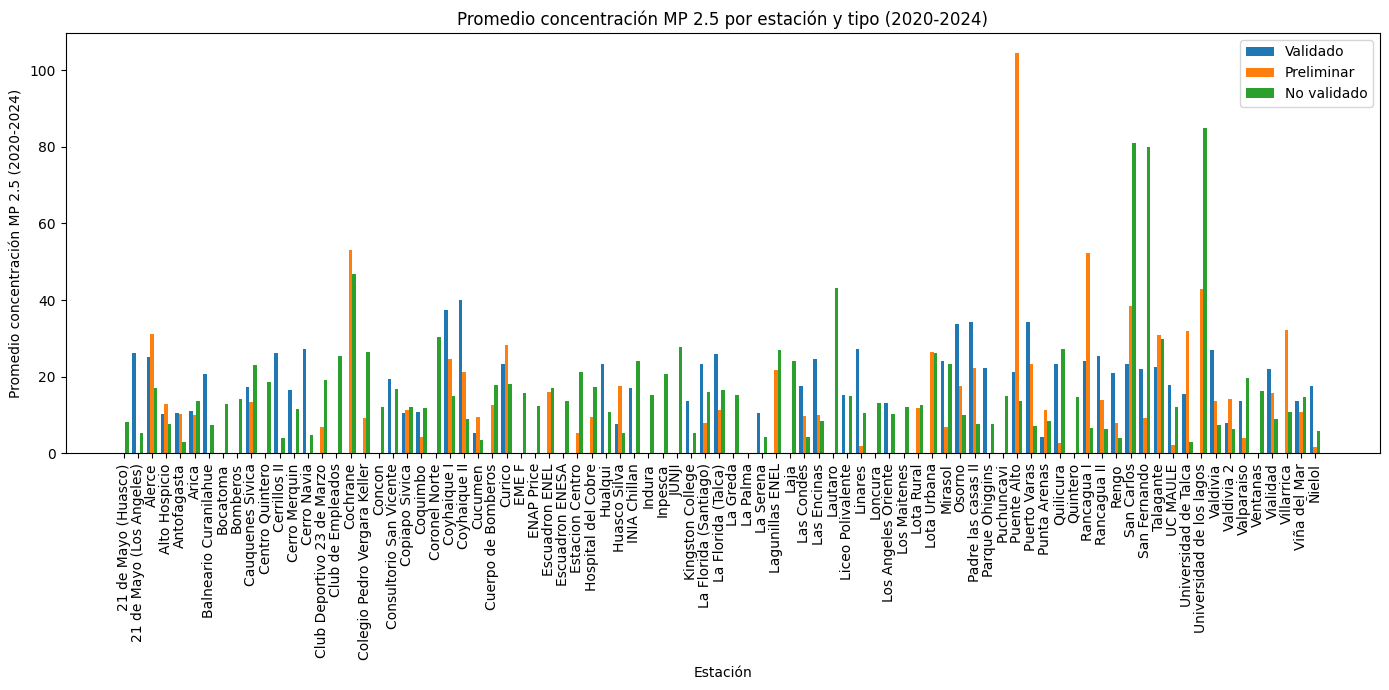

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar registros entre 2020 y 2024
tabla_20_24 = tabla_final[
    tabla_final['fecha'].str.startswith(('20', '21', '22', '23', '24'))
]

# Calcular el promedio por estación para cada tipo
promedio = tabla_20_24.groupby('nombre_estacion')[
    ['concentracion_de_MP_2_5', 'concentracion_de_MP_2_5_preliminares', 'concentracion_de_MP_2_5_no_validados']
].mean()

# Crear gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(promedio.index))
width = 0.25

ax.bar(x - width, promedio['concentracion_de_MP_2_5'], width, label='Validado')
ax.bar(x, promedio['concentracion_de_MP_2_5_preliminares'], width, label='Preliminar')
ax.bar(x + width, promedio['concentracion_de_MP_2_5_no_validados'], width, label='No validado')

ax.set_ylabel('Promedio concentración MP 2.5 (2020-2024)')
ax.set_xlabel('Estación')
ax.set_title('Promedio concentración MP 2.5 por estación y tipo (2020-2024)')
ax.set_xticks(x)
ax.set_xticklabels(promedio.index, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

## Análisis temporal focalizado - Año 2023

Para un análisis más preciso, nos enfocamos en el año 2023 utilizando exclusivamente los registros validados de concentración de PM2.5, lo que garantiza mayor confiabilidad en los patrones identificados.

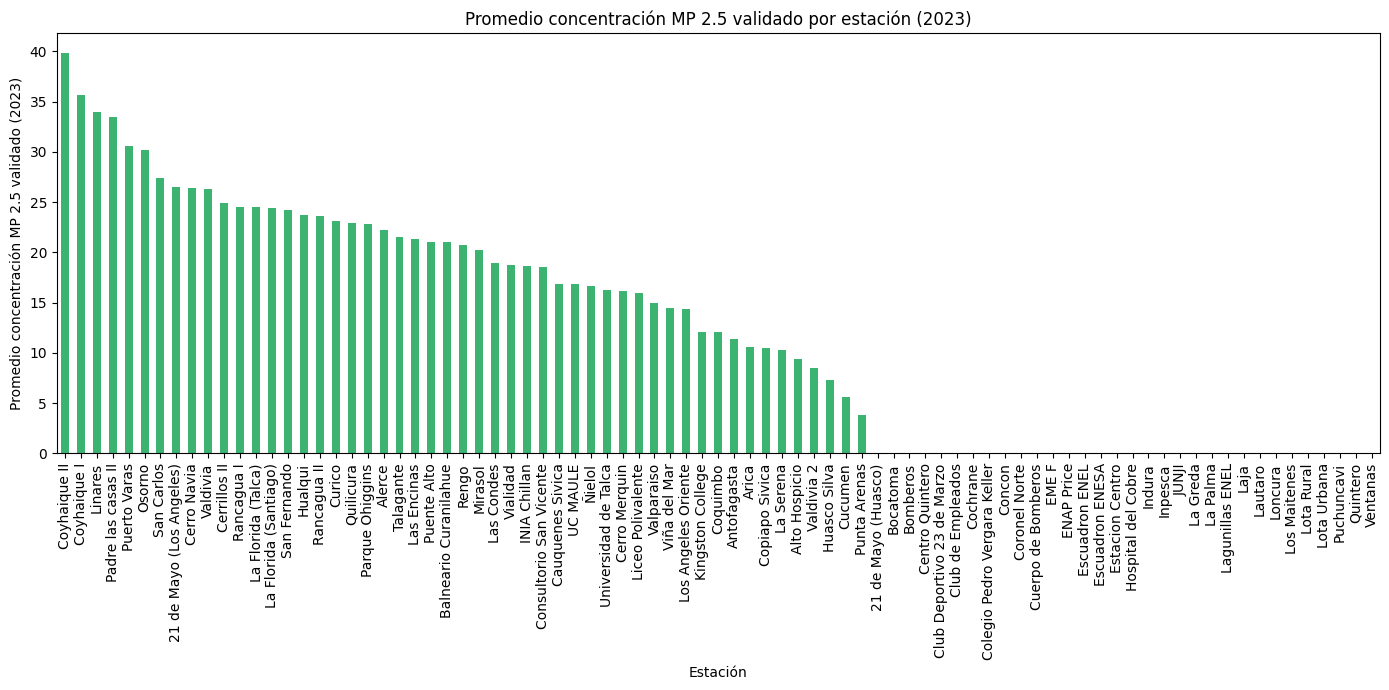

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar registros entre 2020 y 2024
tabla_2023 = tabla_final[
    tabla_final['fecha'].str.startswith('23')
]

# Calcular el promedio de datos validados por estación
promedio_validados = tabla_2023.groupby('nombre_estacion')['concentracion_de_MP_2_5'].mean().sort_values(ascending=False)

# Graficar solo datos validados
plt.figure(figsize=(14, 7))
promedio_validados.plot(kind='bar', color='mediumseagreen')
plt.ylabel('Promedio concentración MP 2.5 validado (2023)')
plt.xlabel('Estación')
plt.title('Promedio concentración MP 2.5 validado por estación (2023)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Análisis de variabilidad estacional - Coyhaique II

Examinamos las series temporales de Coyhaique II para caracterizar la variabilidad de las concentraciones de PM2.5 a través de diferentes intervalos temporales y estaciones del año, identificando patrones estacionales y fluctuaciones características de esta zona geográfica.

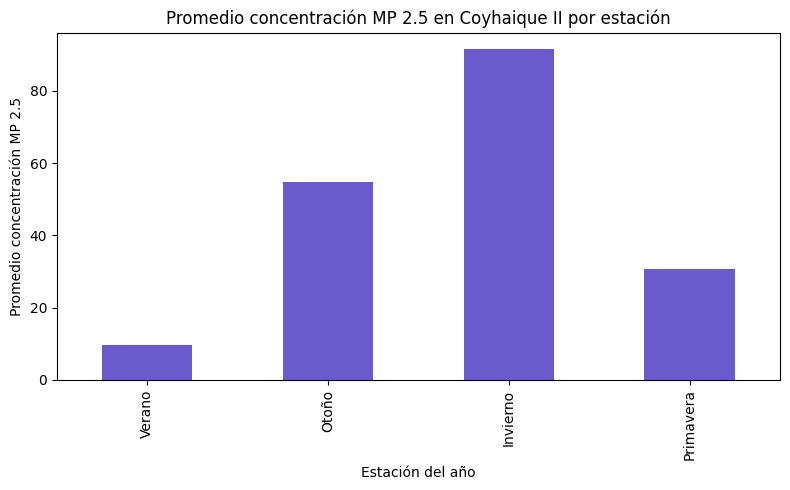

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar solo Coyhaique II
df_coyhaique = tabla_final[tabla_final['nombre_estacion'] == 'Coyhaique II'].copy()

# Crear columna de mes
df_coyhaique['mes'] = df_coyhaique['fecha'].str[2:4].astype(int)

# Asignar estación del año según mes
def get_estacion(mes):
    if mes in [12, 1, 2]:
        return 'Verano'
    elif mes in [3, 4, 5]:
        return 'Otoño'
    elif mes in [6, 7, 8]:
        return 'Invierno'
    else:
        return 'Primavera'

df_coyhaique['estacion'] = df_coyhaique['mes'].apply(get_estacion)

# Calcular promedio por estación del año
promedio_estacion = df_coyhaique.groupby('estacion')['concentracion_de_MP_2_5'].mean().reindex(['Verano', 'Otoño', 'Invierno', 'Primavera'])

# Graficar
plt.figure(figsize=(8, 5))
promedio_estacion.plot(kind='bar', color='slateblue')
plt.ylabel('Promedio concentración MP 2.5')
plt.xlabel('Estación del año')
plt.title('Promedio concentración MP 2.5 en Coyhaique II por estación')
plt.tight_layout()
plt.show()

In [122]:
# Filtrar registros de Coyhaique II para el año 2023
df_coyhaique_2023 = tabla_final[(tabla_final['nombre_estacion'] == 'Coyhaique II') & (tabla_final['fecha'].str.startswith('23'))].copy()

# Agrupar por fecha y hora para encontrar el día con mayor concentración
df_coyhaique_2023.loc[:, 'fecha_hora'] = df_coyhaique_2023['fecha'] + ' ' + df_coyhaique_2023['hora']
concentraciones_por_hora = df_coyhaique_2023.groupby('fecha_hora')['concentracion_de_MP_2_5'].mean()

# Obtener el día con mayor concentración
dia_max_concentracion = concentraciones_por_hora.idxmax()
max_concentracion = concentraciones_por_hora.max()

# Filtrar datos para el día con mayor concentración
datos_max_dia = df_coyhaique_2023[df_coyhaique_2023['fecha_hora'].str.startswith(dia_max_concentracion.split()[0])]

# Agrupar por hora para obtener las concentraciones
concentraciones_por_hora_max_dia = datos_max_dia.groupby('hora')['concentracion_de_MP_2_5'].mean()
print("Concentraciónes de MP 2.5 en Coyhaique II por hora en su día de mayor concentración de 2023")
concentraciones_por_hora_max_dia

Concentraciónes de MP 2.5 en Coyhaique II por hora en su día de mayor concentración de 2023


hora
0000     395.0
0100     378.0
0200     453.0
0300     345.0
0400     274.0
0500     232.0
0600     328.0
0700     264.0
0800     640.0
0900     533.0
1000     262.0
1100     140.0
1200      51.0
1300      56.0
1400      57.0
1500      51.0
1600      57.0
1700     302.0
1800     442.0
1900     593.0
2000     729.0
2100     707.0
2200     863.0
2300    1020.0
Name: concentracion_de_MP_2_5, dtype: float64

## Exploración de correlaciones meteorológicas

¿Existen relaciones significativas entre las concentraciones de PM2.5 y las variables meteorológicas? Analizamos la posible correlación con parámetros como velocidad del viento, temperatura y humedad relativa.

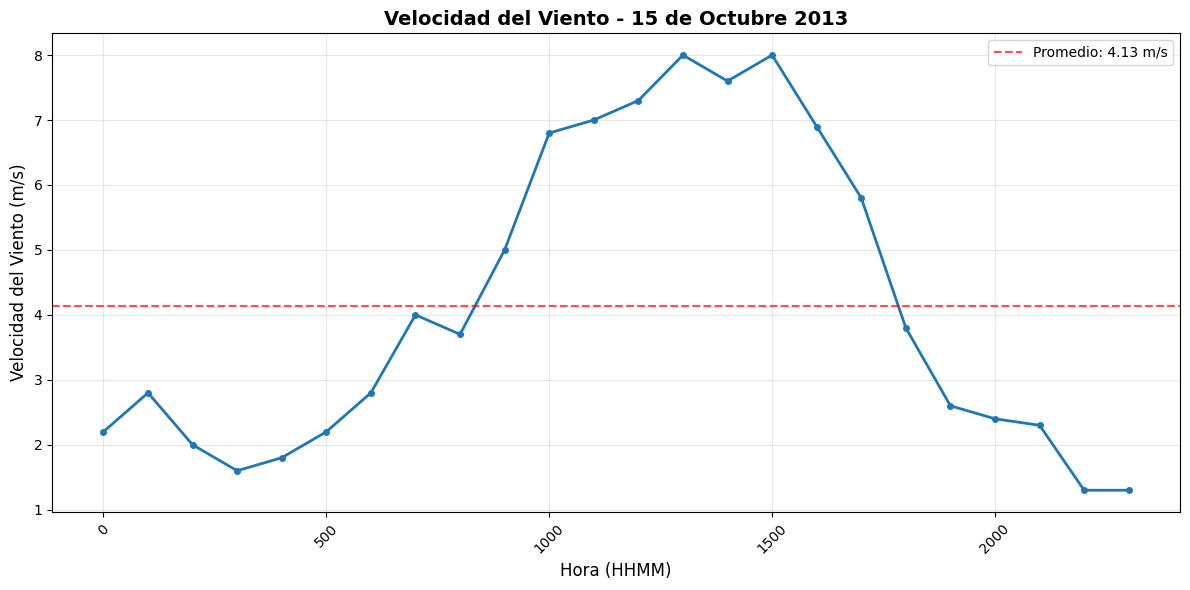

In [121]:
import pandas as pd

# Definir la ruta del archivo
VV_coyhaique = r'c:\Users\busta\Escritorio\mineria_datos_CC5205\Datos\Coyhaique II\Meteorologico\VV-10M.csv'

# Función para obtener datos por hora de un día específico
def obtener_datos_dia_especifico(df, fecha_objetivo):

    # Filtrar por fecha específica
    datos_dia = df[df['fecha'] == fecha_objetivo].copy()
    
    # Convertir hora a formato más legible
    datos_dia['Hora_Formato'] = datos_dia['hora'].apply(lambda x: f"{x//100:02d}:{x%100:02d}")
    
    # Ordenar por hora
    datos_dia = datos_dia.sort_values('hora')
    
    # Limpiar y convertir velocidad del viento (reemplazar comas por puntos)
    datos_dia['velocidad_viento_limpia'] = pd.to_numeric(
        datos_dia['concentracion_MP_2_5'].astype(str).str.replace(',', '.'), 
        errors='coerce'
    )
    
    # Seleccionar solo las columnas relevantes
    resultado = datos_dia[['Hora_Formato', 'hora', 'velocidad_viento_limpia']].reset_index(drop=True)
    resultado.columns = ['Hora', 'Hora_Original', 'Velocidad_Viento']
    
    return resultado

# Ejemplo de visualización para un día específico
visualizar_dia(df_vv_10m, 131015, "Velocidad del Viento - 15 de Octubre 2013")


## Detección de anomalías - Estación Coyhaique II

Implementamos un análisis sistemático de detección de valores atípicos mediante visualizaciones estadísticas (boxplots, histogramas) y métricas robustas (IQR, límites de outliers) para identificar episodios anómalos en las concentraciones de PM2.5 y caracterizar su frecuencia temporal.

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Preparar datos de Coyhaique II (solo datos validados)
df_coyhaique_anomalias = tabla_final[tabla_final['nombre_estacion'] == 'Coyhaique II'].copy()
df_coyhaique_anomalias = df_coyhaique_anomalias.dropna(subset=['concentracion_de_MP_2_5'])

# Calcular IQR y límites para outliers
Q1 = df_coyhaique_anomalias['concentracion_de_MP_2_5'].quantile(0.25)
Q3 = df_coyhaique_anomalias['concentracion_de_MP_2_5'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_coyhaique_anomalias[
    (df_coyhaique_anomalias['concentracion_de_MP_2_5'] < limite_inferior) |
    (df_coyhaique_anomalias['concentracion_de_MP_2_5'] > limite_superior)
]

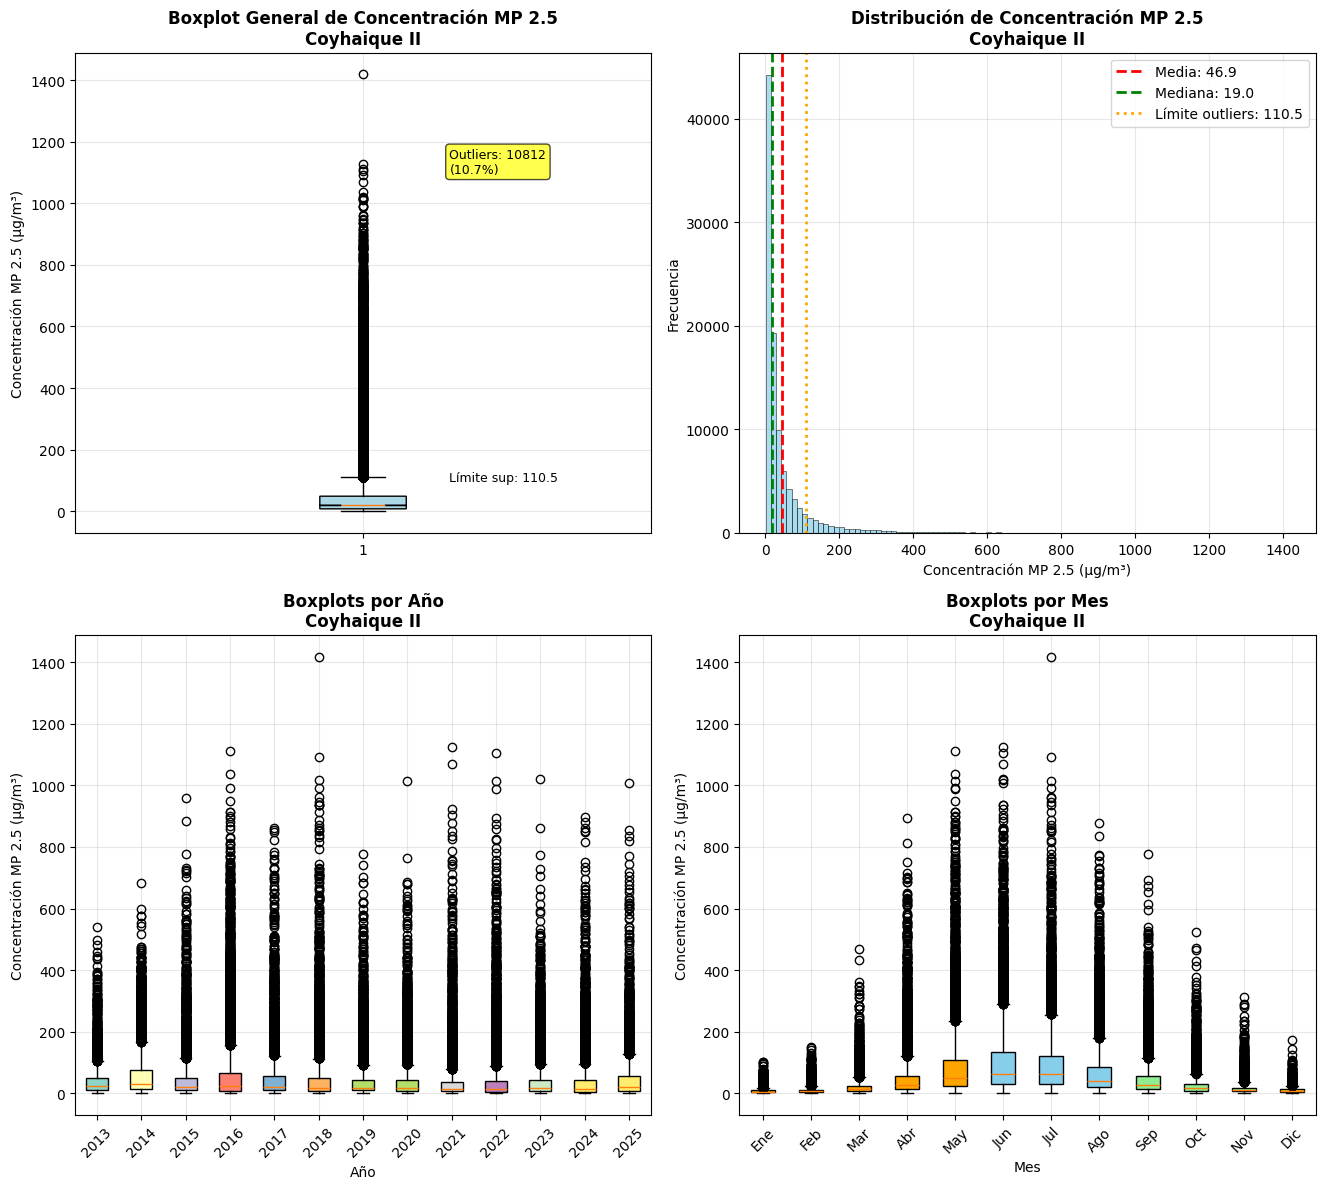

In [132]:
# Crear visualizaciones para detectar anomalías
fig = plt.figure(figsize=(20, 12))

# 1. Boxplot general
plt.subplot(2, 3, 1)
box_plot = plt.boxplot(df_coyhaique_anomalias['concentracion_de_MP_2_5'], 
                       patch_artist=True, notch=True)
box_plot['boxes'][0].set_facecolor('lightblue')
plt.title('Boxplot General de Concentración MP 2.5\nCoyhaique II', fontweight='bold')
plt.ylabel('Concentración MP 2.5 (μg/m³)')
plt.grid(True, alpha=0.3)

# Añadir información de outliers
plt.text(1.15, limite_superior, f'Límite sup: {limite_superior:.1f}', 
         verticalalignment='center', fontsize=9)
outliers_count = len(outliers)
plt.text(1.15, df_coyhaique_anomalias['concentracion_de_MP_2_5'].max()*0.8, 
         f'Outliers: {outliers_count}\n({outliers_count/len(df_coyhaique_anomalias)*100:.1f}%)', 
         verticalalignment='center', fontsize=9, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# 2. Histograma
plt.subplot(2, 3, 2)
plt.hist(df_coyhaique_anomalias['concentracion_de_MP_2_5'], bins=100, 
         color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.axvline(x=df_coyhaique_anomalias['concentracion_de_MP_2_5'].mean(), 
            color='red', linestyle='--', linewidth=2, label=f'Media: {df_coyhaique_anomalias["concentracion_de_MP_2_5"].mean():.1f}')
plt.axvline(x=df_coyhaique_anomalias['concentracion_de_MP_2_5'].median(), 
            color='green', linestyle='--', linewidth=2, label=f'Mediana: {df_coyhaique_anomalias["concentracion_de_MP_2_5"].median():.1f}')
plt.axvline(x=limite_superior, color='orange', linestyle=':', linewidth=2, 
            label=f'Límite outliers: {limite_superior:.1f}')
plt.title('Distribución de Concentración MP 2.5\nCoyhaique II', fontweight='bold')
plt.xlabel('Concentración MP 2.5 (μg/m³)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Boxplot por año para ver tendencias
df_coyhaique_anomalias['año'] = '20' + df_coyhaique_anomalias['fecha'].astype(str).str[:2]
años_disponibles = sorted(df_coyhaique_anomalias['año'].unique())

plt.subplot(2, 3, 4)
datos_por_año = [df_coyhaique_anomalias[df_coyhaique_anomalias['año'] == año]['concentracion_de_MP_2_5'].values 
                 for año in años_disponibles]
box_plots = plt.boxplot(datos_por_año, tick_labels=años_disponibles, patch_artist=True)

# Colorear los boxplots
colors = plt.cm.Set3(np.linspace(0, 1, len(años_disponibles)))
for patch, color in zip(box_plots['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Boxplots por Año\nCoyhaique II', fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Concentración MP 2.5 (μg/m³)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 4. Boxplot por mes para detectar estacionalidad
df_coyhaique_anomalias['mes'] = df_coyhaique_anomalias['fecha'].astype(str).str[2:4].astype(int)
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

plt.subplot(2, 3, 5)
datos_por_mes = [df_coyhaique_anomalias[df_coyhaique_anomalias['mes'] == i]['concentracion_de_MP_2_5'].values 
                 for i in range(1, 13)]
box_plots_mes = plt.boxplot(datos_por_mes, tick_labels=meses, patch_artist=True)

# Colorear según estación del año
colores_estaciones = ['#FFD700', '#FFD700', '#FFA500', '#FFA500', '#FFA500', 
                      '#87CEEB', '#87CEEB', '#87CEEB', '#90EE90', '#90EE90', '#90EE90', '#FFD700']
for patch, color in zip(box_plots_mes['boxes'], colores_estaciones):
    patch.set_facecolor(color)

plt.title('Boxplots por Mes\nCoyhaique II', fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Concentración MP 2.5 (μg/m³)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

## Síntesis del análisis de anomalías

El análisis estadístico revela que la estación Coyhaique II presenta episodios recurrentes de contaminación extrema, con mayor frecuencia durante horarios nocturnos y los meses de invierno. Estos patrones son consistentes con:

- **Calefacción residencial:** Incremento en el uso de combustibles sólidos durante la temporada fría
- **Condiciones meteorológicas adversas:** Inversiones térmicas y baja dispersión atmosférica características de la región austral
- **Topografía local:** Configuración geográfica que favorece la acumulación de contaminantes

[URL a Informe + código](https://colab.research.google.com/drive/1wchB5jLNOwCq6QL4pJ7FvcjrYT330I6Q?usp=sharing)